In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/AABA_2006-01-01_to_2018-01-01.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [4]:
data = data[['Open']]
data.head()

,Open
0,39.69
1,41.22
2,40.93
3,42.88
4,43.10


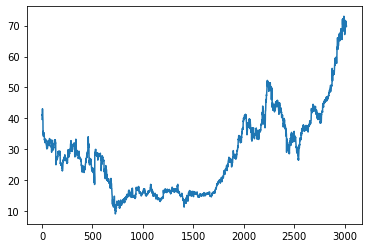

In [5]:
plt.plot(data['Open'])

In [6]:
X = data['Open'].values

In [7]:
X[:10]

array([39.69, 41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  ,
       39.09])

In [9]:
# [
#     [0.        , 0.00999983, 0.01999867] -> [0.0299955],
#     [0.00999983, 0.01999867, 0.0299955] -> [0.03998933],
#     [0.01999867, 0.0299955 , 0.03998933] -> [0.04997917]
#     ...
# ]

In [8]:
X_train, X_test = X[:2500], X[2500:]

In [9]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dense(1))

In [10]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [11]:
XT, yT = [], []
for i in range(len(X_train) - 90):
    d = i + 90
    XT.append(X_train[i:d,])
    yT.append(X_train[d])

In [12]:
Xt, yt = [], []
for i in range(len(X_test) - 90):
    d = i + 90
    Xt.append(X_test[i:d,])
    yt.append(X_test[d])

In [13]:
XT = np.array(XT)
Xt = np.array(Xt)

In [14]:
XT.shape

(2410, 90)

In [15]:
XT[1]

array([41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  , 39.09,
       35.01, 35.82, 34.44, 34.22, 34.55, 35.43, 34.94, 35.26, 35.06,
       35.2 , 34.45, 35.01, 34.  , 33.9 , 33.01, 33.24, 33.01, 32.58,
       32.21, 32.14, 32.62, 33.3 , 32.88, 32.9 , 32.49, 33.01, 33.2 ,
       33.11, 32.63, 32.21, 32.01, 31.7 , 31.53, 31.42, 31.31, 31.05,
       30.4 , 30.72, 30.1 , 31.25, 30.77, 30.34, 30.38, 30.42, 30.33,
       31.52, 32.28, 31.84, 31.45, 32.44, 32.75, 32.45, 32.41, 31.69,
       32.3 , 32.12, 32.85, 32.28, 32.45, 31.44, 31.14, 31.16, 31.17,
       33.47, 33.48, 33.36, 33.01, 32.99, 32.3 , 32.79, 32.88, 32.99,
       32.2 , 32.4 , 32.4 , 32.63, 33.09, 32.68, 32.48, 31.96, 30.71])

In [16]:
yT[1]

30.85

In [17]:
XT = np.reshape(XT, (XT.shape[0], XT.shape[1], 1))
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))

In [18]:
XT.shape

(2410, 90, 1)

In [19]:
XT[1]

array([[41.22],
       [40.93],
       [42.88],
       [43.1 ],
       [42.96],
       [42.19],
       [41.92],
       [41.  ],
       [39.09],
       [35.01],
       [35.82],
       [34.44],
       [34.22],
       [34.55],
       [35.43],
       [34.94],
       [35.26],
       [35.06],
       [35.2 ],
       [34.45],
       [35.01],
       [34.  ],
       [33.9 ],
       [33.01],
       [33.24],
       [33.01],
       [32.58],
       [32.21],
       [32.14],
       [32.62],
       [33.3 ],
       [32.88],
       [32.9 ],
       [32.49],
       [33.01],
       [33.2 ],
       [33.11],
       [32.63],
       [32.21],
       [32.01],
       [31.7 ],
       [31.53],
       [31.42],
       [31.31],
       [31.05],
       [30.4 ],
       [30.72],
       [30.1 ],
       [31.25],
       [30.77],
       [30.34],
       [30.38],
       [30.42],
       [30.33],
       [31.52],
       [32.28],
       [31.84],
       [31.45],
       [32.44],
       [32.75],
       [32.45],
       [32.41],
       [

In [20]:
yT = np.array(yT)
yt = np.array(yt)

In [22]:
history = model.fit(XT, yT, epochs=25, batch_size=40)

Epoch 1/25
61/61 [==============================] - 2s 27ms/step - loss: 0.4011
Epoch 2/25
61/61 [==============================] - 2s 29ms/step - loss: 0.4148
Epoch 3/25
61/61 [==============================] - 2s 29ms/step - loss: 0.4120
Epoch 4/25
61/61 [==============================] - 2s 28ms/step - loss: 0.4122
Epoch 5/25
61/61 [==============================] - 2s 32ms/step - loss: 0.4091
Epoch 6/25
61/61 [==============================] - 2s 26ms/step - loss: 0.4059
Epoch 7/25
61/61 [==============================] - 2s 31ms/step - loss: 0.4104
Epoch 8/25
61/61 [==============================] - 2s 31ms/step - loss: 0.4115
Epoch 9/25
61/61 [==============================] - 2s 33ms/step - loss: 0.4087
Epoch 10/25
61/61 [==============================] - 2s 33ms/step - loss: 0.4156
Epoch 11/25
61/61 [==============================] - 2s 32ms/step - loss: 0.4064
Epoch 12/25
61/61 [==============================] - 2s 35ms/step - loss: 0.4056
Epoch 13/25
61/61 [==================

In [23]:
model.evaluate(Xt, yt)

14/14 [==============================] - 1s 12ms/step - loss: 4.5269


4.526933670043945

In [24]:
XTPredicted = model.predict(XT)
XtPredicted = model.predict(Xt)
XFinal = np.concatenate([XTPredicted, XtPredicted], axis=0)

14/14 [==============================] - 0s 12ms/step


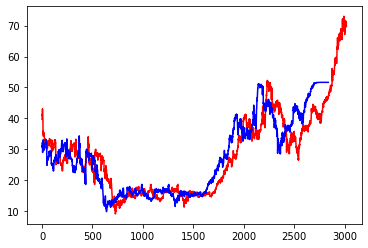

In [25]:
plt.plot(X, color='red')
plt.plot(XFinal, color='blue')